In [1]:
import torch
from torch import nn

In [2]:
data = torch.ones(size=(10,3,28,28)) #(samples,c,w,h)

In [3]:
data

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
        

In [4]:
conv1 = nn.Conv2d(
    kernel_size = 3,
    in_channels = 3,
    out_channels= 6 #扫描6次 得到6个features map
)

In [5]:
conv2 = nn.Conv2d(
    kernel_size = 3,
    in_channels = 6,
    out_channels= 4 #扫描6次 得到6个features map
)

In [6]:
conv1(data).shape

torch.Size([10, 6, 26, 26])

In [7]:
conv2(conv1(data)).shape

torch.Size([10, 4, 24, 24])

In [8]:
#计算公式


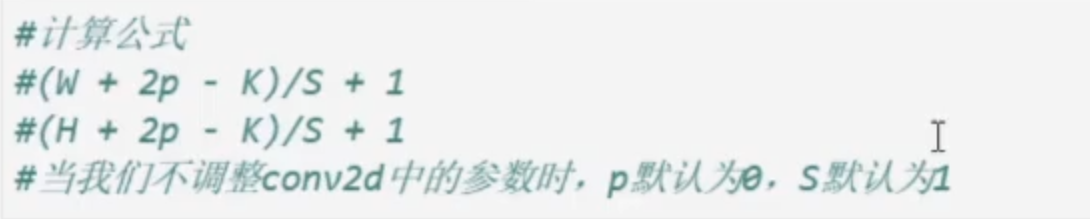

In [9]:
data  = torch.ones(size=(10,3,28,28))

In [10]:
conv1 = nn.Conv2d(3,6,3)
conv2 = nn.Conv2d(6,10,3)
conv3 = nn.Conv2d(10,16,5,
                  stride=2,
                  padding=1)
                #步长
conv4 = nn.Conv2d(16,3,5,
                  stride=3,
                  padding=2)

In [11]:
conv1(data).shape
# 几个图 输出  通道矩阵 

torch.Size([10, 6, 26, 26])

In [12]:
conv2(conv1(data)).shape

torch.Size([10, 10, 24, 24])

In [13]:
conv3(conv2(conv1(data))).shape
#如果计算的结果不是整数 向下取整

torch.Size([10, 16, 11, 11])

In [14]:
conv4(conv3(conv2(conv1(data)))).shape

torch.Size([10, 3, 4, 4])

Pooling Layer

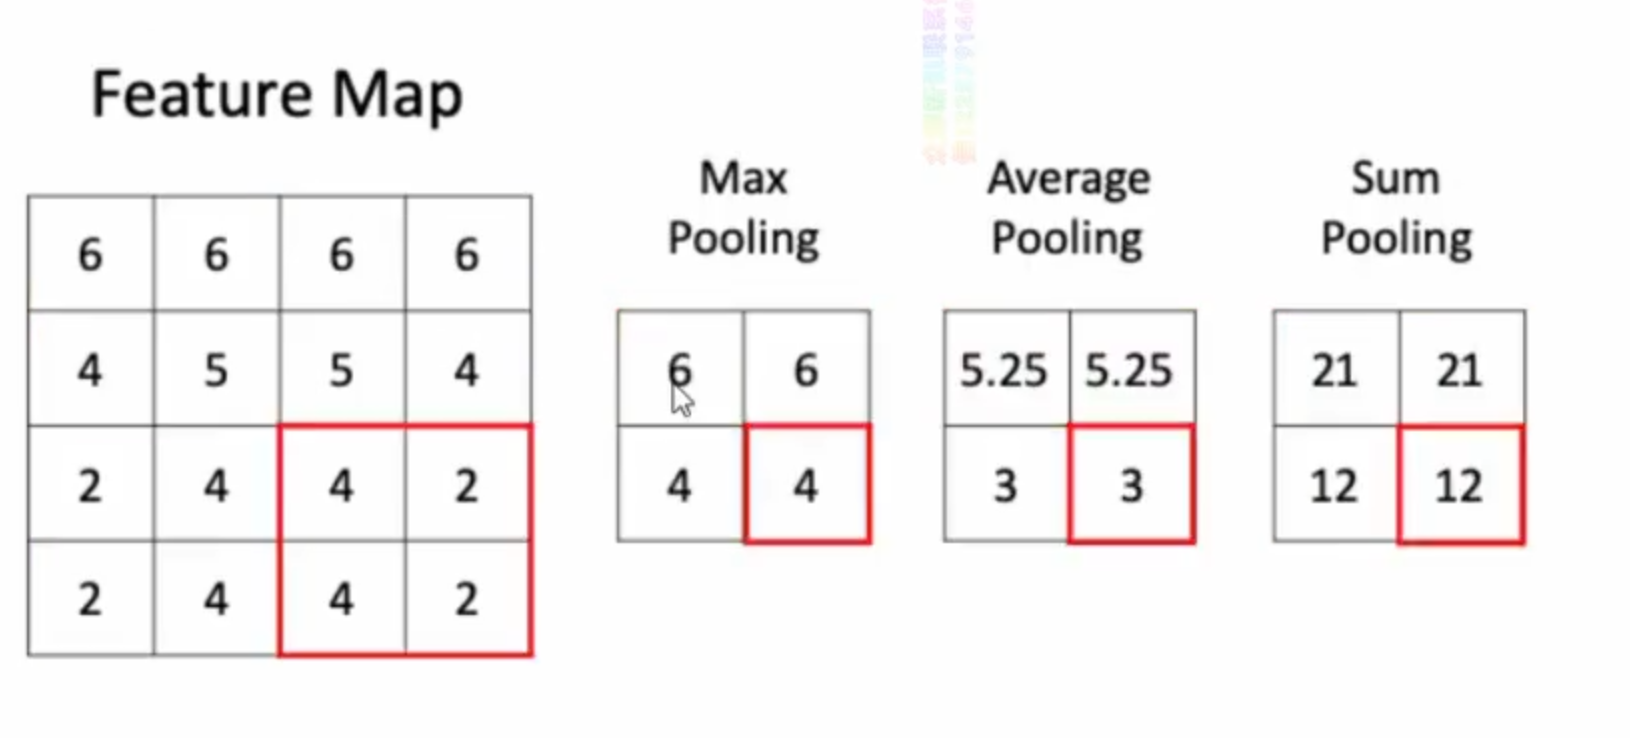

In [15]:
data  = torch.ones(size=(10,3,28,28))

In [16]:
conv1  = nn.Conv2d(3,6,3)
conv3  = nn.Conv2d(6,16,5,
                   stride=2,
                   padding=1)
#（26+ 2 - 5 ) / 2 + 1 = 12

In [17]:
pool1 = nn.MaxPool2d(2) #kernel_size= 2 默认 stride+(2,2)


In [18]:
conv3(conv1(data)).shape

torch.Size([10, 16, 12, 12])

In [19]:
pool1(conv3(conv1(data))).shape

torch.Size([10, 16, 6, 6])

In [20]:
pool2 = nn.AdaptiveAvgPool2d(output_size = 7 ) 

In [21]:
pool2(conv3(conv1(data))).shape

torch.Size([10, 16, 7, 7])

In [22]:
conv1 = nn.Conv2d(3,32,5,padding=2)

In [25]:
conv1(data).shape

torch.Size([10, 32, 28, 28])

In [23]:
bn1 = nn.BatchNorm2d(32)

In [24]:
bn1(conv1(data)).shape

torch.Size([10, 32, 28, 28])

In [26]:
dp1 = nn.Dropout2d(0.4)